In [1]:
import pickle
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np

## Bootstrap Sampling 

In [2]:
root_path = './data/'

train_path = root_path + 'train.pkl'
val_path = root_path + 'val.pkl'
test_path = root_path + 'test.pkl'

In [3]:
print(train_path)

./data/train.pkl


In [4]:
def df_filter(df_data):
    df_data = df_data[df_data['category'] != '无法确定']
    return df_data

def read_pkl(path):
    with open(path, "rb") as f:
        t = pickle.load(f)
    return t

category_dict = {
            "科技": 0,  #Science
            "军事": 1,  #Military
            "教育考试": 2,  #Education
            "灾难事故": 3,  #Accidents
            "政治": 4,  #Politics
            "医药健康": 5,  #Health
            "财经商业": 6,  #Finance
            "文体娱乐": 7,  #Entertainment
            "社会生活": 8 #Society
        }

In [5]:
train_data = df_filter(read_pkl(train_path))
val_data = df_filter(read_pkl(val_path))
test_data = df_filter(read_pkl(test_path))

In [6]:
train_data.head()

,content,label,category
0,【三星折叠屏原型机曝光：双屏设计/非柔性屏】网友@黎启lee晒出三星的ProjcetV可折叠...,0,科技
1,【能电鱼，更能电力找鱼：别以为电鳗只有把鱼电晕一招！】电鳗2米长的身体里有许多专门发电的细胞...,0,科技
2,新版微博个人主页过两天就上线了！包括访客到访和被转发评论次数等新功能。参考图如下，来自：@A...,1,科技
3,在iPad2发售几小时后，国外玩家就已经对它进行了拆解。想了解如此轻薄的机身如何容纳下这么多...,0,科技
4,#乐享时光#现在科学家都这么闲了吗?谢谢你告诉我这么重要的结论啊！（转）,0,科技


In [7]:
print('train:',len(train_data.index))
print('val:',len(val_data.index))
print('test:',len(test_data.index))

train: 5473
val: 1825
test: 1830


In [8]:
train_data.replace({'category': category_dict}, inplace = True)
train_data

,content,label,category
0,【三星折叠屏原型机曝光：双屏设计/非柔性屏】网友@黎启lee晒出三星的ProjcetV可折叠...,0,0
1,【能电鱼，更能电力找鱼：别以为电鳗只有把鱼电晕一招！】电鳗2米长的身体里有许多专门发电的细胞...,0,0
2,新版微博个人主页过两天就上线了！包括访客到访和被转发评论次数等新功能。参考图如下，来自：@A...,1,0
3,在iPad2发售几小时后，国外玩家就已经对它进行了拆解。想了解如此轻薄的机身如何容纳下这么多...,0,0
4,#乐享时光#现在科学家都这么闲了吗?谢谢你告诉我这么重要的结论啊！（转）,0,0
...,...,...,...
5468,十万火急-----谁的群多？请帮忙转一下：一个重庆打工者，22岁，叫骆婕，不知道在什么地方，...,1,8
5469,【派出所打死人还是猝死?】原文；宁波市象山石浦派出所，因为抓赌打死人，有无天理?杀人者偿命如...,1,8
5470,对于近日打砸抢地报道万感痛心！理性爱国什么时候才能做到啊！？自己喝毒药想让别人难受怎么可能无...,1,8
5471,【10岁的他走了，捐献器官救5人[泪]】11月28日，安徽临泉10岁男孩陈硕外出遇车祸被确诊...,0,8


<AxesSubplot: xlabel='category', ylabel='count'>

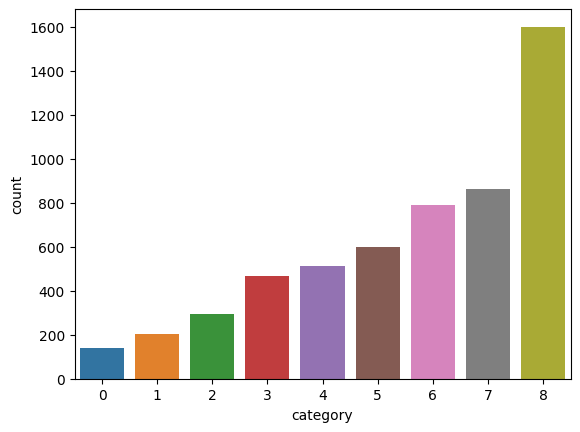

In [9]:
sns.countplot(x='category', 
              data=train_data)

<AxesSubplot: xlabel='category', ylabel='count'>

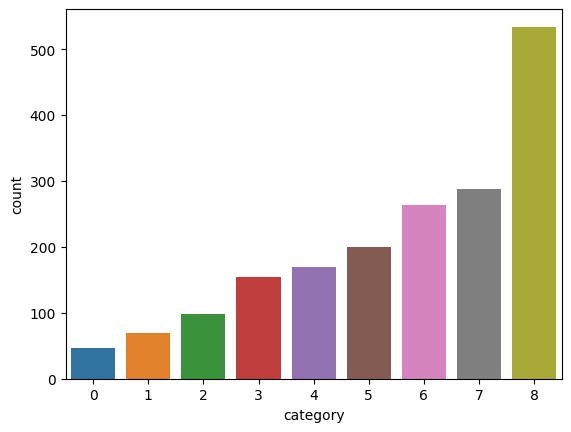

In [10]:
val_data.replace({'category': category_dict}, inplace = True)
sns.countplot(x='category', 
              data=val_data)

<AxesSubplot: xlabel='category', ylabel='count'>

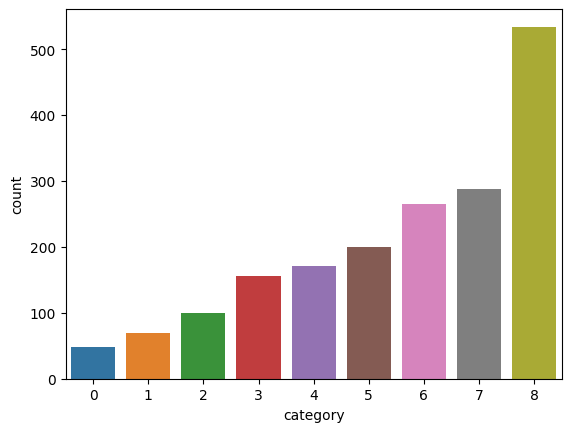

In [11]:
test_data.replace({'category': category_dict}, inplace = True)
sns.countplot(x='category', 
              data=test_data)

In [12]:
total = len(train_data.index) + len(val_data.index) + len(test_data.index)

print('proportions:', len(train_data.index)/total,'|', len(val_data.index)/total, '|', len(test_data.index)/total)

proportions: 0.5995836985100789 | 0.19993426818580193 | 0.2004820333041192


They used a stratified sample => create 4 additional startified sample data sets with proporitions 60/20/20 for train, val and test respectively

In [13]:
full_data = pd.concat([train_data, val_data, test_data], axis=0).sort_values('category').reset_index(drop=True)
full_data

,content,label,category
0,【三星折叠屏原型机曝光：双屏设计/非柔性屏】网友@黎启lee晒出三星的ProjcetV可折叠...,0,0
1,【和TA坐在“飞机机顶”看风景，你想试试吗？】飞机顶部装着透明观景罩，罩内设两个座椅，乘客可...,0,0
2,“撤回已发送消息”可以说是聊天软件必备，QQ与微信把这一时间设置为最长2分钟，超过这一时间就...,0,0
3,【北向资金火力全开！芯片、5G、新能源一个都不能少！】11月5日，总体净买入110.0亿元。...,0,0
4,@宜家家居IKEA的30多块钱的太阳能小夜灯'右下角那个是用来吸收太阳能的'今天虽然下雨'但...,0,0
...,...,...,...
9123,11月20日下午，云南省宣威市某矿场门口，高利贷公司雇佣一辆大卡车和数量小轿车堵住矿场大门讨...,0,8
9124,爱知县的一家叫做「暖家ダイニング」的居酒屋推出的胶原蛋白火锅，又被称为龙珠火锅，当然要点满七...,0,8
9125,车牌号浙BL0535这个车刚从武汉回威宁，车上的人确诊了偷跑回来的，大家看到了及时报警，希望...,1,8
9126,【史上最凄惨一幕：八旬老人挥泪割稻草】现在云南，贵州等地大旱，一些地区旱情超过去年可谓百年一...,1,8


In [14]:
def train_validate_test_split(df, train_percent=.6, validate_percent=.2, seed=None):
    np.random.seed(seed)
    perm = np.random.permutation(df.index)
    m = len(df.index)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = df.iloc[perm[:train_end]]
    validate = df.iloc[perm[train_end:validate_end]]
    test = df.iloc[perm[validate_end:]]
    return train, validate, test

In [15]:
n_sets = 9

train_sets = []
val_sets = []
test_sets = []


rng = np.random.RandomState(204)
print(rng)
for i in range(n_sets):
    randint = rng.randint(low=0, high=32767)
    print(randint)
    train, val, test = train_validate_test_split(full_data, seed = randint)
    train_sets.append(train)
    val_sets.append(val)
    test_sets.append(test)

RandomState(MT19937)
29761
26364
245
19725
12261
6682
6748
13311
18946


Reverse the values in 'category' from number to character:

In [16]:
reverse_dict = {
    0: "科技",  #Science
    1: "军事",  #Military
    2: "教育考试",  #Education
    3: "灾难事故",  #Accidents
    4: "政治",  #Politics
    5: "医药健康",  #Health
    6: "财经商业",  #Finance
    7: "文体娱乐",  #Entertainment
    8: "社会生活" #Society   
}

for i in range(n_sets):
    train_sets[i].replace({'category': reverse_dict}, inplace = True)
    val_sets[i].replace({'category': reverse_dict}, inplace = True)
    test_sets[i].replace({'category': reverse_dict}, inplace = True)

/var/folders/rk/h1hvnhts7rx45_xrjn622k3h0000gn/T/ipykernel_60624/3785319405.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_sets[i].replace({'category': reverse_dict}, inplace = True)
/var/folders/rk/h1hvnhts7rx45_xrjn622k3h0000gn/T/ipykernel_60624/3785319405.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_sets[i].replace({'category': reverse_dict}, inplace = True)
/var/folders/rk/h1hvnhts7rx45_xrjn622k3h0000gn/T/ipykernel_60624/3785319405.py:16: SettingWithCopyWarning: 
A value is tryin

In [17]:
val_sets[2].head()

,content,label,category
1870,【女副局长狂言后才道歉这是个伪命题】近日，有网友爆料，吉林省长春市南关区教育局一女副局长谭某...,0,政治
3711,#腾讯偷拍事件#国内大型互联网企业腾X某事业部办公室男洗手间摊上大事了…接报警察已经到场封锁...,1,财经商业
4284,民航局今日召开3月例行新闻发布会，民航局表示，今年民航行业仍处于恢复增长期。下一步，将继续统...,0,财经商业
582,@青岛交通广播FM897QQ群里朋友捡到粗心高考生的准考证，请相互转下，别耽误孩子考试。白娅...,1,教育考试
6148,#远观#世道真TM变了，一个刚出狱扬言“一辈子不打工”的小偷竟然被数家自媒体公司热捧，这样的...,1,文体娱乐


Export new spilts:

In [18]:
for i in range(n_sets):
    train_expath = root_path + 'train'+str(i+2)+'.pkl'
    val_expath = root_path + 'val'+str(i+2)+'.pkl'
    test_expath = root_path + 'test'+str(i+2)+'.pkl'
    
    train_sets[i].to_pickle(train_expath)
    val_sets[i].to_pickle(val_expath)
    test_sets[i].to_pickle(test_expath)

Check if export worked correctly:

In [19]:
train_sets[0].head()

,content,label,category
2367,@Happy张江发生在在洛阳的真实事，洛阳市委书记的侄子杀死其这位老太太的兄弟，政府及其他部...,1,政治
2756,兰州拉面不能吃了！南京电视台做了一个关于它的节目。所有兰州拉面馆都在使用拉面剂，拉面剂主要成...,1,医药健康
5555,文章道歉与高晓松老师的道歉书惊人相似，这难道是一种新文体正在崛起吗！O网页链接,1,文体娱乐
885,【师生课堂口角升级互扇耳光后扭打】近日，有网友上传一段视频：在某校的一节课上，老师与学生发生...,0,教育考试
2850,嚣张！深圳女子买药不配合信息登记还殴打店员。现场惨叫连连。#个别省份又出现聚集性病例#-刘百...,1,医药健康


In [20]:
train2_path = root_path + 'train2.pkl'

train2 = df_filter(read_pkl(train2_path))
train2.head()

,content,label,category
2367,@Happy张江发生在在洛阳的真实事，洛阳市委书记的侄子杀死其这位老太太的兄弟，政府及其他部...,1,政治
2756,兰州拉面不能吃了！南京电视台做了一个关于它的节目。所有兰州拉面馆都在使用拉面剂，拉面剂主要成...,1,医药健康
5555,文章道歉与高晓松老师的道歉书惊人相似，这难道是一种新文体正在崛起吗！O网页链接,1,文体娱乐
885,【师生课堂口角升级互扇耳光后扭打】近日，有网友上传一段视频：在某校的一节课上，老师与学生发生...,0,教育考试
2850,嚣张！深圳女子买药不配合信息登记还殴打店员。现场惨叫连连。#个别省份又出现聚集性病例#-刘百...,1,医药健康
